### Project Development

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("saved_model/dataset/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 1.Handling missing data

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [28]:
# Remove duplicates values(0 means we dont have duplicate value)
data.duplicated().sum()

0

In [29]:
#data.drop_duplicates(inplace=True) #make change in real data
#data =data.drop_duplicates()  # create a copy and then remove duplicates

In [30]:
# remove unwanted columns
data.drop(labels=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)# (inplace =true )means change the data permanently axis=1 means columns
data.head()   

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [ ]:
#seperating numerical and catagorical columns
categorical_cols = data.select_dtypes(include='object').columns
numerical_cols = data.select_dtypes(exclude='object').columns

print("categorica;l columns: ",categorical_cols)
print("Numerical Columns: ",numerical_cols)

categorica;l columns:  Index(['Geography', 'Gender'], dtype='object')
Numerical Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
data.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

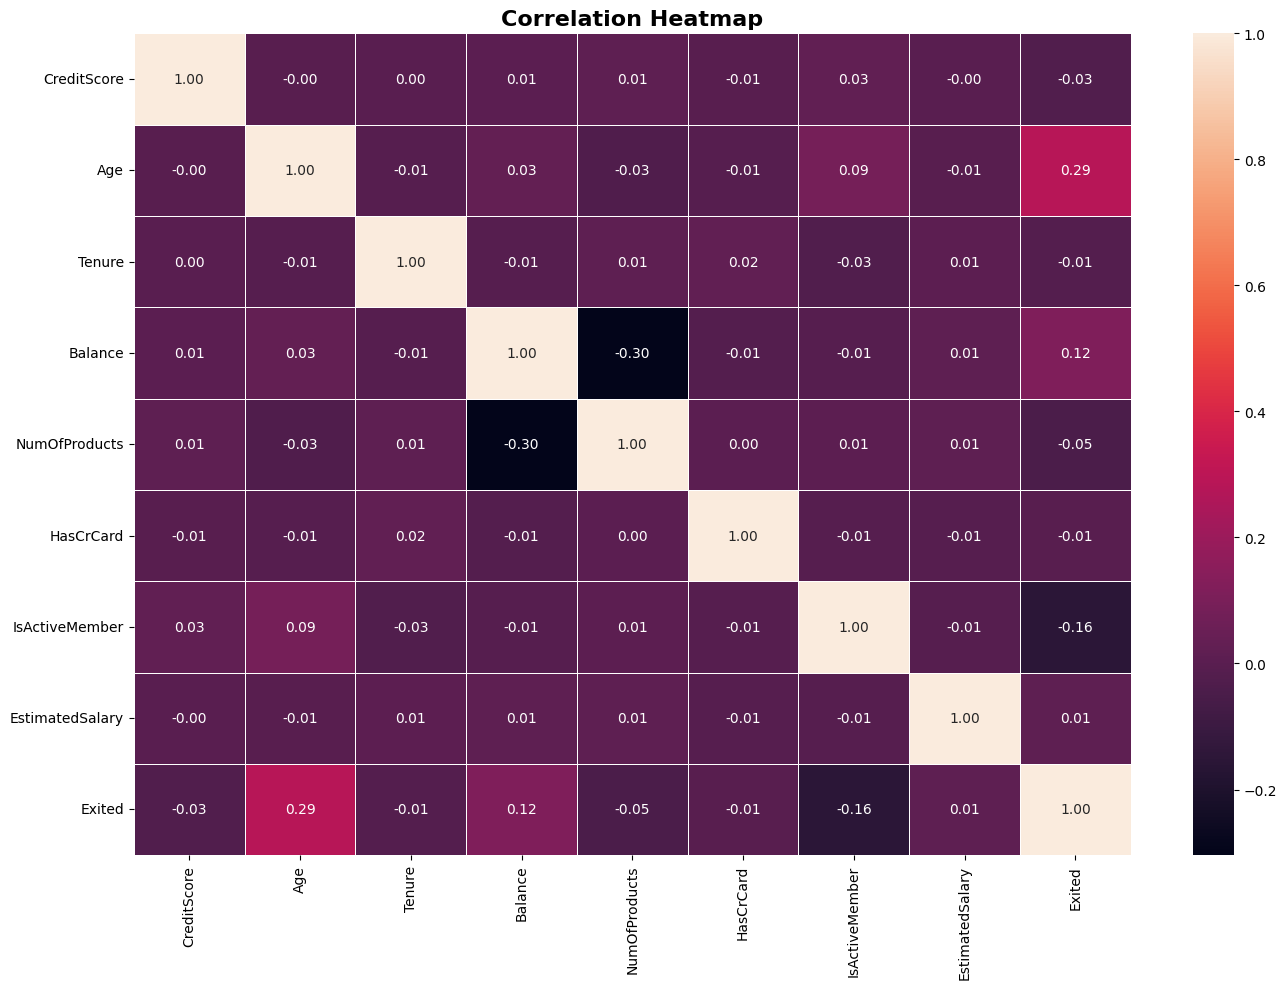

In [ ]:
# correlation ==> Heatmap
plt.figure(figsize=(14, 10))
corr_matrix = data[numerical_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,#show corelation value
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize =16 ,fontweight="bold")
plt.tight_layout()# avoid ovelaping of graph
plt.show()

In [ ]:
# Dependent and independent feature
X=data.drop("Exited",axis=1)
y=data["Exited"]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# to remove exited column
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

print("categorica;l columns: ",categorical_cols)
print("Numerical Columns: ",numerical_cols)

categorica;l columns:  Index(['Geography', 'Gender'], dtype='object')
Numerical Columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
gender_cat = ['Female','Male']
geo_cat = ['France','Spain','Germany']

In [ ]:
num_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [ ]:
num_pipeline= Pipeline(steps=[('scaler', StandardScaler())])
cat_pipeline = Pipeline(steps=[('ordinalencoder',OrdinalEncoder(
    categories=[geo_cat,gender_cat]))])

# columntransformer - ensure data is not leaking
preprocessor= ColumnTransformer(
                [("num_pipline",num_pipeline, numerical_cols),
                 ("cat_pipeline",cat_pipeline,categorical_cols)]
)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Applying the preprocessing pipelines to the training and testing data
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns= preprocessor.get_feature_names_out())

In [ ]:
X_train.head()

,num_pipline__CreditScore,num_pipline__Age,num_pipline__Tenure,num_pipline__Balance,num_pipline__NumOfProducts,num_pipline__HasCrCard,num_pipline__IsActiveMember,num_pipline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


In [ ]:
import pickle
with open("saved_model/preprocessor.pkl","wb") as f:
    pickle.dump(preprocessor,f)

ANN IMPLEMENTATION

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [33]:
X_train.shape[1],

(10,)

In [36]:
model = Sequential([
    Dense(64,activation='relu',input_shape = (X_train.shape[1],)),#create 64 nodes in hidden layer
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                704       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [42]:
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [44]:
log_dir = "logs/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir =log_dir,histogram_freq=1)

In [45]:
# Earlystoping
early_stopping_callback = EarlyStopping(
    monitor = "val_loss",
    patience=5,
    restore_best_weights = True
)

In [47]:
## Train model
history = model.fit(
    X_train,y_train,
    validation_data = (X_test,y_test),
    epochs =100,
    callbacks = [tensorflow_callback,early_stopping_callback]
)

Epoch 1/100


250/250 [==============================] - 4s 8ms/step - loss: 0.4388 - accuracy: 0.8163 - val_loss: 0.3758 - val_accuracy: 0.8420
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3681 - accuracy: 0.8487 - val_loss: 0.3574 - val_accuracy: 0.8520
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3540 - accuracy: 0.8512 - val_loss: 0.3544 - val_accuracy: 0.8525
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3473 - accuracy: 0.8559 - val_loss: 0.3600 - val_accuracy: 0.8535
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8590 - val_loss: 0.3592 - val_accuracy: 0.8540
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8594 - val_loss: 0.3503 - val_accuracy: 0.8570
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8601 - val_loss: 0.3471 - val_accuracy: 0.86

In [48]:
model.save("model.h5")

c:\Users\prakr\anaconda3\envs\.enve\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
loss = history.history['loss']
acc = history.history["accuracy"]
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

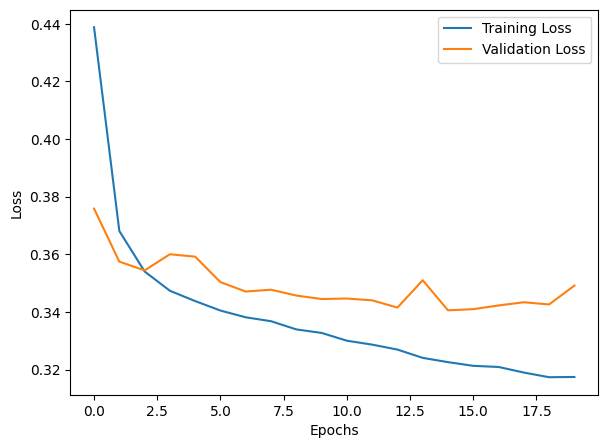

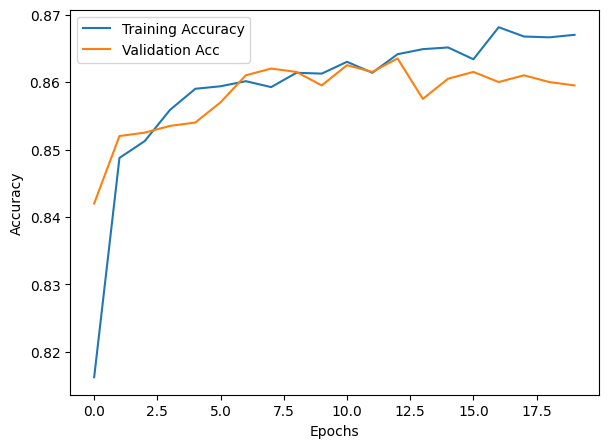

In [51]:
epochs=len(acc)

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [53]:
%load_ext tensorboard

In [55]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 2368), started 0:00:35 ago. (Use '!kill 2368' to kill it.)